# Configure font

In [1]:
# Configure Arial as the default font in all figures

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


arial_font_path = '/PATH/TO/ARIAL/FONT/arial.ttf'

fm.fontManager.addfont(arial_font_path)

plt.rcParams['font.family'] = 'Arial'

# Path to Zenodo files folder

In [2]:
path = '~/analyses/Cores/final_submission/zenodo/'

# Figure S6

## Panel A

In [3]:
import pandas as pd
folding_ddGs = pd.read_csv(path+'FigS6/FYN_folding_ivscaled_ddGs_order2.txt',sep='\t',index_col=0)
folding_dddGs = pd.read_csv(path+'FigS6/FYN_folding_ivscaled_dddGs_order2.txt',sep='\t',index_col=0)

folding_ddGs_sparse = pd.read_csv(path+'FigS6/FYN_folding_ivscaled_ddGs_order2_sparse_regularized.txt',sep='\t',index_col=0)
folding_dddGs_sparse = pd.read_csv(path+'FigS6/FYN_folding_ivscaled_dddGs_order2_sparse_regularized.txt',sep='\t',index_col=0)

folding_dddGs['in_sparse_model']=False
for index, row in folding_dddGs.iterrows():
    folding_dddGs.at[index,'abs_coupling']=abs(row.dddG)
    try:
        len(folding_dddGs_sparse.loc[index])
        folding_dddGs.at[index,'in_sparse_model']=True
    except KeyError:
        folding_dddGs.at[index,'in_sparse_model']=False

folding_ddGs['in_sparse_model']=False
for index, row in folding_ddGs.iterrows():
    try:
        len(folding_ddGs_sparse.loc[index])
        folding_ddGs.at[index,'in_sparse_model']=True
    except KeyError:
        folding_ddGs.at[index,'in_sparse_model']=False

In [4]:
folding_ddGs["wt"] = pd.Series(dtype="object") 
folding_ddGs["mut"] = pd.Series(dtype="object") 
for index, row in folding_ddGs.iterrows():
    folding_ddGs.at[index,'wt']=str(index[0])
    folding_ddGs.at[index,'pos']=int(index[1:-1])
    folding_ddGs.at[index,'mut']=str(index[-1])
folding_ddGs = folding_ddGs.sort_values('pos')
folding_ddGs

,ddG,scaled_std,in_sparse_model,wt,mut,pos
F3I,1.548978,0.160746,True,F,I,3.0
F3L,1.089101,0.085766,True,F,L,3.0
F3M,0.743231,0.153710,False,F,M,3.0
F3V,0.465207,0.136150,False,F,V,3.0
L17M,0.510299,0.155162,False,L,M,17.0
L17F,0.593216,0.159789,False,L,F,17.0
L17V,1.952142,0.188572,True,L,V,17.0
L17I,0.385099,0.194453,True,L,I,17.0
F19V,1.952572,0.201350,True,F,V,19.0
F19M,0.934744,0.220705,True,F,M,19.0


In [5]:
# get AA properties

# based on AAindex1, a list of 566 features
# see feature indices and names here: https://www.genome.jp/aaindex/AAindex/list_of_indices

import pandas as pd
from protlearn.features import aaindex1

amino_acids = list('ACDEFGHIKLMNPQRSTVWY')
aaind, inds = aaindex1(amino_acids)#, standardize='zscore')
DTS_AA_props = pd.DataFrame(data=aaind, columns=inds, index=amino_acids)#.reset_index().rename(columns={'index':'AA'})
DTS_AA_props

/users/project/prj004631/aescobedo/miniconda3/envs/BIO/lib/python3.12/site-packages/protlearn/features/aaindex1.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


,ANDN920101,ARGP820101,ARGP820102,ARGP820103,BEGF750101,BEGF750102,BEGF750103,BHAR880101,BIGC670101,BIOV880101,...,KARS160113,KARS160114,KARS160115,KARS160116,KARS160117,KARS160118,KARS160119,KARS160120,KARS160121,KARS160122
A,4.35,0.61,1.18,1.56,1.00,0.77,0.37,0.357,52.6,16.0,...,6.0,6.000,6.0,6.0,12.000,6.000,12.000,0.000,6.000,0.000
C,4.65,1.07,1.89,1.23,0.06,0.65,0.84,0.346,68.3,168.0,...,6.0,16.670,12.0,22.0,28.000,9.330,28.000,0.000,11.333,6.000
D,4.76,0.46,0.05,0.14,0.44,0.65,0.97,0.511,68.4,-78.0,...,12.0,16.400,12.0,20.0,34.000,6.800,28.634,0.000,10.400,2.969
E,4.29,0.47,0.11,0.23,0.73,0.55,0.53,0.497,84.7,-106.0,...,12.0,21.000,14.0,26.0,40.000,6.670,28.731,0.000,10.667,1.822
F,4.66,2.02,1.96,2.03,0.60,0.98,0.53,0.314,113.9,189.0,...,18.0,23.250,18.0,24.0,48.000,6.000,26.993,0.000,12.000,2.026
G,3.97,0.07,0.49,0.62,0.35,0.65,0.97,0.544,36.3,-13.0,...,1.0,3.500,1.0,6.0,7.000,3.500,7.000,0.000,3.500,0.000
H,4.63,0.61,0.31,0.29,0.60,0.83,0.75,0.323,91.9,50.0,...,15.0,23.100,18.0,31.0,47.000,4.700,24.243,-1.734,10.400,1.605
I,3.95,2.22,1.45,1.67,0.73,0.98,0.37,0.462,102.0,151.0,...,12.0,15.600,12.0,18.0,30.000,6.000,24.841,-1.641,9.600,3.373
K,4.36,1.15,0.06,0.15,0.60,0.55,0.75,0.466,105.1,-141.0,...,12.0,24.500,18.0,31.0,37.000,6.170,22.739,-0.179,10.167,1.372
L,4.17,1.53,3.23,2.93,1.00,0.83,0.53,0.365,102.0,145.0,...,12.0,15.600,12.0,18.0,30.000,6.000,25.021,0.000,9.600,3.113


In [6]:
import pandas as pd
AAont = pd.read_csv(path+'FigS2/AAontology_SupplTable3.txt', sep='\t', encoding = "ISO-8859-1", index_col=0).drop('Unnamed: 5', axis=1)
AAont

,category,subcategory,scale_name,scale_description
scale_id,,,,
LINS030110,ASA/Volume,Accessible surface area (ASA),ASA (folded coil/turn),Total median accessible surfaces of whole resi...
LINS030113,ASA/Volume,Accessible surface area (ASA),ASA (folded coil/turn),% total accessible surfaces of whole residues ...
JANJ780101,ASA/Volume,Accessible surface area (ASA),ASA (folded protein),"Average accessible surface area (Janin et al.,..."
JANJ780103,ASA/Volume,Accessible surface area (ASA),ASA (folded protein),"Percentage of exposed residues (Janin et al., ..."
LINS030104,ASA/Volume,Accessible surface area (ASA),ASA (folded protein),Total median accessible surfaces of whole resi...
...,...,...,...,...
GEOR030108,Structure-Activity,Stability (helix-coil),Linker (helical),Linker propensity from helical (annotated by D...
FINA770101,Structure-Activity,Stability (helix-coil),Stability (helix-coil),Helix-coil equilibrium constant (Finkelstein-P...
PTIO830101,Structure-Activity,Stability (helix-coil),Stability (helix-coil),Helix-coil equilibrium constant (Ptitsyn-Finke...


In [7]:
aaindex_featureNames = pd.read_csv(path+'FigS2/AAindex_featureNames.txt',sep='\t', header=None)

aaindex_featureNames = aaindex_featureNames[0].str.split(' ', n=1, expand = True)
aaindex_id = aaindex_featureNames[0]
aaindex_featureNames = pd.concat([aaindex_id, aaindex_featureNames[1].str.split('(', n=1, expand=True)], axis=1)
aaindex_featureNames.columns = ['id', 'name', 'source']
aaindex_featureNames['name'] = aaindex_featureNames['name'].str.removesuffix(' ')
aaindex_featureNames['source'] = aaindex_featureNames['source'].str.removesuffix(')')
aaindex_featureNames = aaindex_featureNames.set_index('id')
aaindex_featureNames.at['SCHeavyAtoms','name']='Number of sidechain heavy atoms'
aaindex_featureNames.at['SCHeavyAtoms','source']='Escobedo, 2025'
aaindex_featureNames.at['SCCarbons','name']='Number of sidechain carbon atoms'
aaindex_featureNames.at['SCCarbons','source']='Escobedo, 2025'

aaindex_featureNames

,name,source
id,,
ANDN920101,alpha-CH chemical shifts,"Andersen et al., 1992"
ARGP820101,Hydrophobicity index,"Argos et al., 1982"
ARGP820102,Signal sequence helical potential,"Argos et al., 1982"
ARGP820103,Membrane-buried preference parameters,"Argos et al., 1982"
BEGF750101,Conformational parameter of inner helix,"Beghin-Dirkx, 1975"
...,...,...
KARS160120,Weighted minimum eigenvalue based on the atomi...,"Karkbara-Knisley, 2016"
KARS160121,Weighted average eigenvalue based on the atomi...,"Karkbara-Knisley, 2016"
KARS160122,Weighted second smallest eigenvalue of the wei...,"Karkbara-Knisley, 2016"


In [8]:
hydrophobicity_scales = list(AAont[AAont['scale_description'].str.contains('hydrophobicity', case=False, na=False)].index)

hydrophobicity_scales_filtered = []
for scale in hydrophobicity_scales:
    if scale in DTS_AA_props.columns:
        hydrophobicity_scales_filtered.append(scale)

DTS_AA_props[hydrophobicity_scales_filtered]

,ENGD860101,FASG890101,KIDA850101,PRAM900101,ARGP820101,CIDH920101,CIDH920102,CIDH920103,CIDH920104,CIDH920105,...,COWR900101,BLAS910101,MANP780101,PONP800101,PONP800102,PONP800103,PONP800104,PONP800105,PONP800106,WILM950104
A,-1.6,-0.21,-0.27,-6.7,0.61,-0.45,-0.08,0.36,0.17,0.02,...,0.42,0.616,12.97,12.28,7.62,2.63,13.65,14.60,10.67,-2.34
C,-2.0,-6.04,-1.05,-8.4,1.07,0.79,0.76,0.70,1.24,0.77,...,0.84,0.680,14.63,14.93,10.93,3.36,14.49,15.90,14.15,5.03
D,9.2,1.36,0.81,38.5,0.46,-1.52,-0.71,-1.09,-1.05,-1.04,...,-0.51,0.028,10.85,10.97,6.18,2.29,10.98,13.78,10.21,-0.48
E,8.2,2.30,1.17,34.3,0.47,-0.80,-1.31,-0.83,-1.19,-1.14,...,-0.37,0.043,11.89,11.19,6.38,2.31,12.55,13.59,11.71,1.30
F,-3.7,-4.65,-1.43,-15.5,2.02,1.48,1.53,1.01,1.29,1.35,...,1.74,1.000,14.00,13.43,8.99,3.02,14.08,14.18,13.27,2.57
G,-1.0,0.00,-0.16,-4.2,0.07,-1.00,-0.84,-0.82,-0.57,-0.80,...,0.00,0.501,12.43,12.01,7.31,2.55,15.36,14.18,10.95,-1.06
H,3.0,-1.23,0.28,12.6,0.61,1.07,0.43,0.16,-0.25,0.26,...,-2.28,0.165,12.16,12.84,7.85,2.57,11.59,15.35,12.07,-3.00
I,-3.1,-4.81,-0.77,-13.0,2.22,0.76,1.39,2.17,2.06,1.81,...,1.81,0.943,15.67,14.77,9.99,3.08,14.63,14.10,12.95,7.26
K,8.8,3.88,1.70,36.8,1.15,-0.36,-0.09,-0.56,-0.62,-0.41,...,-2.03,0.283,11.36,10.80,5.72,2.12,11.96,13.28,9.93,1.56
L,-2.8,-4.68,-1.10,-11.7,1.53,1.29,1.24,1.18,0.96,1.14,...,1.80,0.943,14.90,14.10,9.37,2.98,14.01,16.49,13.07,1.09


In [9]:
wt_props = DTS_AA_props.loc[folding_ddGs['wt']]
mut_props = DTS_AA_props.loc[folding_ddGs['mut']]

prop_change_dict = {}

for scale in DTS_AA_props[hydrophobicity_scales_filtered].columns:

    dprop = mut_props[scale].values - wt_props[scale].values

    prop_change_dict[scale] = dprop

prop_change_df = pd.DataFrame(prop_change_dict)
prop_change_df

,ENGD860101,FASG890101,KIDA850101,PRAM900101,ARGP820101,CIDH920101,CIDH920102,CIDH920103,CIDH920104,CIDH920105,...,COWR900101,BLAS910101,MANP780101,PONP800101,PONP800102,PONP800103,PONP800104,PONP800105,PONP800106,WILM950104
0,0.6,-0.16,0.66,2.5,0.20,-0.72,-0.14,1.16,0.77,0.46,...,0.07,-0.057,1.67,1.34,1.00,0.06,0.55,-0.08,-0.32,4.69
1,0.9,-0.03,0.33,3.8,-0.49,-0.19,-0.29,0.17,-0.33,-0.21,...,0.06,-0.057,0.90,0.67,0.38,-0.04,-0.07,2.31,-0.20,-1.48
2,0.3,0.99,0.70,1.3,-0.84,-0.11,-0.26,0.20,-0.69,-0.35,...,-0.56,-0.262,0.39,0.90,0.84,0.16,-0.68,2.05,1.73,-1.95
3,1.1,1.15,1.03,4.6,-0.70,-0.22,-0.44,0.20,-0.08,-0.22,...,-0.40,-0.175,1.71,1.64,1.39,0.19,-1.20,2.12,0.59,-0.51
4,-0.6,1.02,0.37,-2.5,-0.35,0.08,0.03,0.03,-0.36,-0.14,...,-0.62,-0.205,-0.51,0.23,0.46,0.20,-0.61,-0.26,1.93,-0.47
5,-0.9,0.03,-0.33,-3.8,0.49,0.19,0.29,-0.17,0.33,0.21,...,-0.06,0.057,-0.90,-0.67,-0.38,0.04,0.07,-2.31,0.20,1.48
6,0.2,1.18,0.70,0.8,-0.21,-0.03,-0.15,0.03,0.25,-0.01,...,-0.46,-0.118,0.81,0.97,1.01,0.23,-1.13,-0.19,0.79,0.97
7,-0.3,-0.13,0.33,-1.3,0.69,-0.53,0.15,0.99,1.10,0.67,...,0.01,0.000,0.77,0.67,0.62,0.10,0.62,-2.39,-0.12,6.17
8,1.1,1.15,1.03,4.6,-0.70,-0.22,-0.44,0.20,-0.08,-0.22,...,-0.40,-0.175,1.71,1.64,1.39,0.19,-1.20,2.12,0.59,-0.51
9,0.3,0.99,0.70,1.3,-0.84,-0.11,-0.26,0.20,-0.69,-0.35,...,-0.56,-0.262,0.39,0.90,0.84,0.16,-0.68,2.05,1.73,-1.95


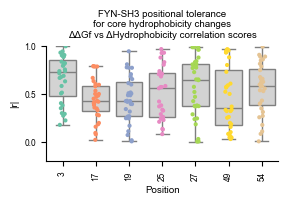

In [10]:
from scipy.stats import pearsonr
import seaborn as sns

plt.rcParams['font.family'] = 'Arial'

r_all_pos = pd.DataFrame()
for pos in sorted([int(i) for i in list(folding_ddGs['pos'].unique())]):
    r_all = [pearsonr(prop_change_df.loc[folding_ddGs.reset_index()['pos']==pos][prop],folding_ddGs.loc[folding_ddGs['pos']==pos]['ddG'])[0] for prop in prop_change_df.columns]
    r_all = pd.DataFrame(r_all, index=prop_change_df.columns)
    r_all.columns = ['r']
    r_all['r_abs'] = abs(r_all['r'])
    r_all['pos'] = pos
    r_all_pos = pd.concat([r_all_pos, r_all], axis=0, ignore_index=False)
r_all_pos

fig,ax=plt.subplots(figsize=(3,1.5))
sns.boxplot(x=r_all_pos['pos'], y=r_all_pos['r_abs'], color='lightgray')#,ax=ax_bot)
sns.stripplot(data=r_all_pos, x='pos', hue="pos", y="r_abs", color='black', size=3, jitter=True, legend=False, palette='Set2')
category_counts = r_all_pos['pos'].value_counts()

plt.xticks(rotation=90,fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel('Position', fontsize=7)
plt.ylabel('|r|', fontsize=7)
plt.ylim(-0.2,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('FYN-SH3 positional tolerance\nfor core hydrophobicity changes\nΔΔGf vs ΔHydrophobicity correlation scores', fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_positional_tolerance_for_hydrophobic_mutations.svg', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

## Panel B

In [11]:
### SECONDARY STRUCTURE WITH DSSP ###

from Bio.PDB import PDBParser, DSSP
from pathlib import Path
pdb_path = str(Path(path).expanduser())

parser = PDBParser()
structure = parser.get_structure('5zau', pdb_path+'/FigS6/5zau.pdb')

model = structure[0]



dssp = DSSP(model, pdb_path+'/FigS6/5zau.pdb', dssp='/users/project/prj004631/aescobedo/miniconda3/envs/BIO/bin/mkdssp')

dssp_list=[]
for key, value in dssp.property_dict.items():
    res_id, dssp_info = key, value
    if res_id[0] == 'A':
        dssp_list.append(dssp_info[2])
        
folding_ddGs["secondary_structure"] = pd.Series(dtype="object")
for index, row in folding_ddGs.iterrows():
    folding_ddGs.at[index,'secondary_structure'] = dssp_list[int(row.pos)-1]

folding_ddGs

,ddG,scaled_std,in_sparse_model,wt,mut,pos,secondary_structure
F3I,1.548978,0.160746,True,F,I,3.0,E
F3L,1.089101,0.085766,True,F,L,3.0,E
F3M,0.743231,0.153710,False,F,M,3.0,E
F3V,0.465207,0.136150,False,F,V,3.0,E
L17M,0.510299,0.155162,False,L,M,17.0,-
L17F,0.593216,0.159789,False,L,F,17.0,-
L17V,1.952142,0.188572,True,L,V,17.0,-
L17I,0.385099,0.194453,True,L,I,17.0,-
F19V,1.952572,0.201350,True,F,V,19.0,B
F19M,0.934744,0.220705,True,F,M,19.0,B


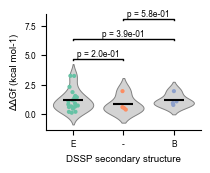

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import itertools

plt.rcParams['font.family'] = 'Arial'

# Function to perform Mann-Whitney U tests for all secondary structure pairs
def mann_whitney_tests(data, group_col, value_col):
    unique_groups = sorted(data[group_col].unique())  # Sorted to keep ordering consistent
    comparisons = list(itertools.combinations(unique_groups, 2))
    p_values = {}

    for g1, g2 in comparisons:
        group1 = data[data[group_col] == g1][value_col]
        group2 = data[data[group_col] == g2][value_col]
        stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
        p_values[(g1, g2)] = p_value

    return p_values

# Function to add significance annotation stacked above each other
def add_stat_annotations(ax, p_values, unique_groups):
    y_max = ax.get_ylim()[1]
    h = (y_max - ax.get_ylim()[0]) * 0.01  # Small gap above violins
    y_start = y_max * 1.02  # Initial height for annotations

    for i, ((g1, g2), p_value) in enumerate(p_values.items()):
        x1 = unique_groups.index(g1)
        x2 = unique_groups.index(g2)
        y = y_start + i * h * 30  # Stacking each annotation

        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='black')
        text = f"p = {p_value:.1e}"
        ax.text((x1 + x2) * 0.5, y + h * 2.5, text, ha='center', va='bottom', color='black', fontsize=6)

def add_mean_lines(ax, data, group_col, value_col):
    means = data.groupby(group_col)[value_col].mean()
    
    # Get the x-tick order used by Seaborn
    xticklabels = [tick.get_text() for tick in ax.get_xticklabels()]
    
    # Reorder means based on x-tick order
    means = means.reindex(xticklabels)
    
    for i, (group, mean) in enumerate(means.items()):
        ax.hlines(y=mean, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=1.5, zorder=3)

# Perform statistical tests
p_values_ddG = mann_whitney_tests(folding_ddGs, "secondary_structure", "ddG")

# Get sorted unique secondary structure classes
unique_ss = sorted(folding_ddGs["secondary_structure"].unique())

# Create the violin plot
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.violinplot(
    data=folding_ddGs, x="secondary_structure", y="ddG", hue="secondary_structure",
    split=False, ax=ax, inner=None, linewidth=0.7, edgecolor='gray', palette=["lightgray"] * len(unique_ss)
)
sns.stripplot(data=folding_ddGs, x="secondary_structure", y="ddG", 
              hue="secondary_structure", palette='Set2', size=3, jitter=True, ax=ax, dodge=False, legend=False)

# Add mean lines
add_mean_lines(ax, folding_ddGs, "secondary_structure", "ddG")

# Add statistical annotations
add_stat_annotations(ax, p_values_ddG, unique_ss)

ax.set_xlabel("DSSP secondary structure", fontsize=7)
ax.set_ylabel("ΔΔGf (kcal mol-1)", fontsize=7)
ax.xaxis.set_tick_params(labelsize=6)
for label in ax.get_yticklabels():
    label.set_fontsize(6)

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Panel C

In [13]:
for index, row in folding_dddGs.iterrows():
    pos_mut1 = int(row.Pos.split('_')[0])
    pos_mut2 = int(row.Pos.split('_')[1])
    folding_dddGs.at[index,'primseqdist']=pos_mut2-pos_mut1

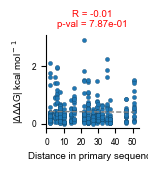

In [14]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Arial'

#predicted_vs_measured=predicted_vs_measured.rename(columns={'Nham_aa': 'Number of\nMutations', 'Observed': 'Observed\nin DTS lib.'})

fig, ax = plt.subplots(figsize=(1.2,1.2))

folding_dddGs = folding_dddGs.sort_values('primseqdist', ascending=True)

ax=sns.scatterplot(x='primseqdist', y=folding_dddGs['dddG'].abs(), data=folding_dddGs ,edgecolor='k', linewidth=0.1, s=10)

scatter_ylim=ax.get_ylim()

#ax.axhspan(folding_dddGs[folding_dddGs['3d_dist_sidechain_category']=='<5Å']['dddG'].abs().mean(),ax.get_ylim()[0],facecolor='gray', alpha=0.1)


x = folding_dddGs[['primseqdist']].to_numpy()
y = folding_dddGs[['dddG']].abs().to_numpy()


model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r,p = pearsonr(y.ravel(),x.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')

ax.set_ylim(scatter_ylim)
ax.set_xticks(np.arange(0,60,10))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
for label in ax.get_yticklabels():
    label.set_fontsize(6)
ax.spines[['right', 'top']].set_visible(False)

#legend=plt.legend(bbox_to_anchor=(1.55,1.31), fontsize=6,frameon=False, handletextpad=0.1, title='Minimum\nsidechain\ndistance')
#legend.get_title().set_fontsize('7')
plt.xlabel('Distance in primary sequence', fontsize=7)
plt.ylabel('|ΔΔΔG| kcal mol$^-$$^1$', fontsize=7)
plt.title('R = '+str(round(r,2))+ '\np-val = '+'{:0.2e}'.format(p), fontsize=7, color='red')
plt.show()

## Panel D

In [15]:
#Calculate residue minimum heavy atom distances from PDB structure

import Bio.PDB
import numpy as np
from Bio.PDB import PDBParser, PDBIO, Select
from Bio.SeqUtils import seq1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


def calc_residue_dist(residue_one, residue_two) :
    """Returns the minimum distance between any atom in two residues (except for backbone C, O and N)"""
    #if 'CB' in residue_one and 'CB' in residue_two:
    all_residue_one_distances=[]
    all_residue_one_distance_names=[]
    residue_one_id= residue_one.get_full_id()[3][1]
    residue_one_chain= residue_one.get_full_id()[2]
    residue_two_id= residue_two.get_full_id()[3][1]
    residue_two_chain= residue_two.get_full_id()[2]
    for atom_one in residue_one:
        atom_one_type=str(atom_one)
        atom_one_type=atom_one_type[6:-1]
        if atom_one_type[0] != 'H' and atom_one_type != 'N' and atom_one_type != 'C' and atom_one_type != 'O': #and atom_one_type != 'CA':
            all_atom_one_distances=[]
            all_atom_dist_names = []
            for atom_two in residue_two:
                atom_two_type=str(atom_two)
                atom_two_type=atom_two_type[6:-1]
                if atom_two_type[0] != 'H' and atom_two_type != 'N' and atom_two_type != 'C' and atom_two_type != 'O': #and atom_two_type != 'CA':
                    diff_vector = atom_one.coord - atom_two.coord
                    all_atom_one_distances.append(np.sqrt(np.sum(diff_vector * diff_vector)))
                    all_atom_dist_names.append('/'+residue_one_chain+':'+str(residue_one_id)+'@'+atom_one_type+'/'+residue_two_chain+':'+str(residue_two_id)+'@'+atom_two_type)
            all_residue_one_distances.append(min(all_atom_one_distances))
            all_residue_one_distance_names.append(all_atom_dist_names[all_atom_one_distances.index(min(all_atom_one_distances))])
    return [min(all_residue_one_distances), all_residue_one_distance_names[all_residue_one_distances.index(min(all_residue_one_distances))]]

def calc_residue_dist_allatom(residue_one, residue_two) :
    """Returns the minimum distance between any atom in two residues"""
    all_residue_one_distances=[]
    all_residue_one_distance_names=[]
    residue_one_id= residue_one.get_full_id()[3][1]
    residue_one_chain= residue_one.get_full_id()[2]
    residue_two_id= residue_two.get_full_id()[3][1]
    residue_two_chain= residue_two.get_full_id()[2]
    for atom_one in residue_one:
        atom_one_type=str(atom_one)
        atom_one_type=atom_one_type[6]
        if atom_one_type != 'H':
            all_atom_one_distances=[]
            all_atom_dist_names = []
            for atom_two in residue_two:
                atom_two_type=str(atom_two)
                atom_two_type=atom_two_type[6]
                if atom_two_type != 'H':
                    diff_vector = atom_one.coord - atom_two.coord
                    all_atom_one_distances.append(np.sqrt(np.sum(diff_vector * diff_vector)))
                    all_atom_dist_names.append('/'+residue_one_chain+':'+str(residue_one_id)+'@'+atom_one_type+'/'+residue_two_chain+':'+str(residue_two_id)+'@'+atom_two_type)
                    #all_atom_one_distances.append(np.linalg.norm(atom_one.coord - atom_two.coord))
            all_residue_one_distances.append(min(all_atom_one_distances))
            all_residue_one_distance_names.append(all_atom_dist_names[all_atom_one_distances.index(min(all_atom_one_distances))])
    return [min(all_residue_one_distances), all_residue_one_distance_names[all_residue_one_distances.index(min(all_residue_one_distances))]]

def calc_dist_matrix(chain_one, chain_two) :
    """Returns a matrix of side-chain distances between two chains"""
    answer = np.zeros((len(chain_one), len(chain_two)), float)
    resseqs = {chain.id:[residue.id[1] for residue in chain.get_residues()] for chain in structure.get_chains()} #Read sequence numbers
    closest_atoms = pd.DataFrame(index=resseqs[chain_one.id],columns=resseqs[chain_two.id])
    for row, residue_one in enumerate(chain_one) :
        for col, residue_two in enumerate(chain_two) :
            closest_atoms.at[row+resseqs[chain_one.id][0],col+resseqs[chain_one.id][1]-1]=calc_residue_dist(residue_one, residue_two)[1]
            answer[row, col] = calc_residue_dist(residue_one, residue_two)[0]
    return [answer, closest_atoms]

def calc_dist_matrix_allatom(chain_one, chain_two) :
    """Returns a matrix of minimum distances between two chains, considering all heavy atoms"""
    answer = np.zeros((len(chain_one), len(chain_two)), float)
    resseqs = {chain.id:[residue.id[1] for residue in chain.get_residues()] for chain in structure.get_chains()} #Read sequence numbers
    closest_atoms = pd.DataFrame(index=resseqs[chain_one.id],columns=resseqs[chain_two.id])
    for row, residue_one in enumerate(chain_one) :
        for col, residue_two in enumerate(chain_two) :
            closest_atoms.at[row+resseqs[chain_one.id][0],col+resseqs[chain_one.id][1]-1]=calc_residue_dist_allatom(residue_one, residue_two)[1]
            answer[row, col] = calc_residue_dist_allatom(residue_one, residue_two)[0]
    return [answer, closest_atoms]


pdb_code='5zau'
pdb_filename = pdb_path + '/FigS6/' + pdb_code + '.pdb'

structure = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_filename)
model = structure[0]

chain = 'A'

dist_matrix = calc_dist_matrix(model[chain], model[chain])[0]
closest_atoms = calc_dist_matrix(model[chain], model[chain])[1]

dist_matrix_allatom = calc_dist_matrix_allatom(model[chain], model[chain])[0]
closest_atoms_allatom = calc_dist_matrix_allatom(model[chain], model[chain])[1]

chains = {chain.id:seq1(''.join(residue.resname for residue in chain)) for chain in structure.get_chains()} #Read amino acid sequence
resseqs = {chain.id:[residue.id[1] for residue in chain.get_residues()] for chain in structure.get_chains()} #Read sequence numbers

seq = chains[chain]
seq=list(seq)
seq_nr=resseqs[chain]

real_pos = [2,16,18,24,26,48,53]

core_dists=pd.DataFrame()
for pos1 in real_pos:
    for pos2 in real_pos:
        core_dists.at[pos1+1,pos2+1]=dist_matrix[pos1][pos2]

In [16]:
fyn_core_pos = [2,16,18,24,26,48,53]
#fyn_core_pos = [i-8 for i in mut_pos_numbers]

folding_dddGs["mutation1"] = pd.Series(dtype="object")
folding_dddGs["mutation2"] = pd.Series(dtype="object")
folding_dddGs["mut1_ddG"] = pd.Series(dtype="object")
folding_dddGs["mut2_ddG"] = pd.Series(dtype="object")
folding_dddGs["single_muts_ddG_sum"] = pd.Series(dtype="object")
folding_dddGs["abs_single_muts_ddG_sum"] = pd.Series(dtype="object")
for index, row in folding_dddGs.iterrows():
    mut1 = row.id_ref.split('_')[0]
    mut2 = row.id_ref.split('_')[1]
    folding_dddGs.at[index,'mutation1']= mut1
    folding_dddGs.at[index,'mutation2']= mut2
    folding_dddGs.at[index,'mut1_ddG']= float(folding_ddGs.loc[mut1]['ddG'])
    folding_dddGs.at[index,'mut2_ddG']= float(folding_ddGs.loc[mut2]['ddG'])
    folding_dddGs.at[index,'single_muts_ddG_sum'] = float(folding_ddGs.loc[mut1]['ddG']) + float(folding_ddGs.loc[mut2]['ddG'])
    folding_dddGs.at[index,'abs_single_muts_ddG_sum'] = abs(float(folding_ddGs.loc[mut1]['ddG']) + float(folding_ddGs.loc[mut2]['ddG']))
initial_res_in_pdb=85-1
fyn_allatom_distances = pd.DataFrame(data=dist_matrix_allatom, index=np.arange(1,len(seq_nr)+1,1), columns=np.arange(1,len(seq_nr)+1,1))
fyn_sidechain_distances = pd.DataFrame(data=dist_matrix, index=np.arange(1,len(seq_nr)+1,1), columns=np.arange(1,len(seq_nr)+1,1))
folding_dddGs["3d_dist_allatom"] = pd.Series(dtype="object") 
folding_dddGs["3d_dist_sidechain"] = pd.Series(dtype="object") 
folding_dddGs["prim_seq_dist"] = pd.Series(dtype="object") 
folding_dddGs["closest_atoms_sidechains"] = pd.Series(dtype="object") 
folding_dddGs["closest_atoms_allatom"] = pd.Series(dtype="object") 
folding_dddGs["core_coupling"] = pd.Series(dtype="object")
folding_dddGs["3d_dist_allatom_category"] = pd.Series(dtype="object")
folding_dddGs["3d_dist_sidechain_category"] = pd.Series(dtype="object") 
for index, row in folding_dddGs.iterrows():
    folding_dddGs.at[index,'3d_dist_allatom']=fyn_allatom_distances[int(row.mutation1[1:-1])][int(row.mutation2[1:-1])]
    folding_dddGs.at[index,'3d_dist_sidechain']=fyn_sidechain_distances[int(row.mutation1[1:-1])][int(row.mutation2[1:-1])]
    folding_dddGs.at[index,'prim_seq_dist']=abs(int(row.mutation1[1:-1])-int(row.mutation2[1:-1]))
    folding_dddGs.at[index,'closest_atoms_sidechains']=closest_atoms[int(row.mutation1[1:-1])+initial_res_in_pdb][int(row.mutation2[1:-1])+initial_res_in_pdb]
    folding_dddGs.at[index,'closest_atoms_allatom']=closest_atoms_allatom[int(row.mutation1[1:-1])+initial_res_in_pdb][int(row.mutation2[1:-1])+initial_res_in_pdb]

    if int(row.mutation1[1:-1]) in [i+1 for i in fyn_core_pos] or int(row.mutation2[1:-1]) in [i+1 for i in fyn_core_pos]:
        folding_dddGs.at[index,'core_coupling']=True
    else:
        folding_dddGs.at[index,'core_coupling']=False
    
    if fyn_allatom_distances[int(row.mutation1[1:-1])][int(row.mutation2[1:-1])] < 5:
        folding_dddGs.at[index,'3d_dist_allatom_category']='<5Å'
    elif fyn_allatom_distances[int(row.mutation1[1:-1])][int(row.mutation2[1:-1])] > 5 and fyn_allatom_distances[int(row.mutation1[1:-1])][int(row.mutation2[1:-1])] <= 10:
        folding_dddGs.at[index,'3d_dist_allatom_category']='5-10Å'
    elif fyn_allatom_distances[int(row.mutation1[1:-1])][int(row.mutation2[1:-1])] > 10 and fyn_allatom_distances[int(row.mutation1[1:-1])][int(row.mutation2[1:-1])] <= 15:
        folding_dddGs.at[index,'3d_dist_allatom_category']='10-15Å'
    else:
        folding_dddGs.at[index,'3d_dist_allatom_category']='>15Å'
        
    if fyn_sidechain_distances[int(row.mutation1[1:-1])][int(row.mutation2[1:-1])] < 5:
        folding_dddGs.at[index,'3d_dist_sidechain_category']='<5Å'
    elif fyn_sidechain_distances[int(row.mutation1[1:-1])][int(row.mutation2[1:-1])] > 5 and fyn_sidechain_distances[int(row.mutation1[1:-1])][int(row.mutation2[1:-1])] <= 10:
        folding_dddGs.at[index,'3d_dist_sidechain_category']='5-10Å'
    elif fyn_sidechain_distances[int(row.mutation1[1:-1])][int(row.mutation2[1:-1])] > 10 and fyn_sidechain_distances[int(row.mutation1[1:-1])][int(row.mutation2[1:-1])] <= 15:
        folding_dddGs.at[index,'3d_dist_sidechain_category']='10-15Å'
    else:
        folding_dddGs.at[index,'3d_dist_sidechain_category']='>15Å'


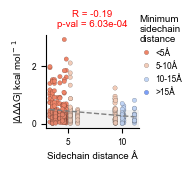

In [17]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'

#predicted_vs_measured=predicted_vs_measured.rename(columns={'Nham_aa': 'Number of\nMutations', 'Observed': 'Observed\nin DTS lib.'})

fig, ax = plt.subplots(figsize=(1.2,1.2))

hue_order=['<5Å', '5-10Å', '10-15Å', '>15Å']

folding_dddGs = folding_dddGs.sort_values('3d_dist_sidechain', ascending=True)

ax=sns.scatterplot(x='3d_dist_sidechain', y=folding_dddGs['dddG'].abs(), data=folding_dddGs.sort_values('3d_dist_sidechain', ascending=True), hue='3d_dist_sidechain_category', hue_order=hue_order, palette='coolwarm_r',edgecolor='k', linewidth=0.1, s=10)

scatter_ylim=ax.get_ylim()

ax.axhspan(folding_dddGs[folding_dddGs['3d_dist_sidechain_category']=='<5Å']['dddG'].abs().mean(),ax.get_ylim()[0],facecolor='gray', alpha=0.1)


x = folding_dddGs[['3d_dist_sidechain']].to_numpy()
y = folding_dddGs[['dddG']].abs().to_numpy()


model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r,p = pearsonr(y.ravel(),x.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')

ax.set_ylim(scatter_ylim)
ax.set_xticks(np.arange(5,15,5))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
for label in ax.get_yticklabels():
    label.set_fontsize(6)
ax.spines[['right', 'top']].set_visible(False)

legend=plt.legend(bbox_to_anchor=(1.55,1.31), fontsize=6,frameon=False, handletextpad=0.1, title='Minimum\nsidechain\ndistance')
legend.get_title().set_fontsize('7')
plt.xlabel('Sidechain distance Å', fontsize=7)
plt.ylabel('|ΔΔΔG| kcal mol$^-$$^1$', fontsize=7)
plt.title('R = '+str(round(r,2))+ '\np-val = '+'{:0.2e}'.format(p), fontsize=7, color='red')
plt.show()

## Panel E

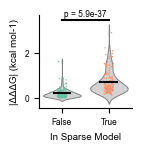

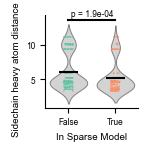

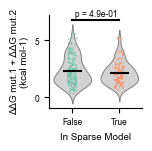

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams['font.family'] = 'Arial'

folding_dddGs['3d_dist_sidechain'] = pd.to_numeric(folding_dddGs['3d_dist_sidechain'],errors='coerce')
folding_dddGs['single_muts_ddG_sum'] = pd.to_numeric(folding_dddGs['single_muts_ddG_sum'],errors='coerce')

# Function to perform Mann-Whitney U test and return p-value
def mann_whitney_test(data, group_col, value_col):
    group1 = data[data[group_col] == True][value_col]
    group2 = data[data[group_col] == False][value_col]
    stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    return p_value

# Function to add significance annotation with scientific notation
def add_stat_annotation(ax, p_value):
    x1, x2 = 0, 1  # X locations of the groups
    y_max = ax.get_ylim()[1]
    h = (y_max - ax.get_ylim()[0]) * 0.01  # Adjust space above violins
    y = y_max * 1  # Increase space between line and violins
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')

    # Format p-value in scientific notation
    text = f"p = {p_value:.1e}"
    ax.text((x1 + x2) * 0.5, y + h * 2.5, text, ha='center', va='bottom', color='black', fontsize=6)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Function to add horizontal lines at the mean values
def add_mean_lines(ax, data, group_col, value_col):
    means = data.groupby(group_col)[value_col].mean()
    for i, (group, mean) in enumerate(means.items()):
        ax.hlines(y=mean, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=1.5, zorder=3)  # Black mean lines

# Perform statistical tests
p_value_dddG = mann_whitney_test(folding_dddGs, "in_sparse_model", "abs_coupling")
p_value_3d_dist = mann_whitney_test(folding_dddGs, "in_sparse_model", "3d_dist_sidechain")
p_value_singles_ddG_sum = mann_whitney_test(folding_dddGs, "in_sparse_model", "single_muts_ddG_sum")

# Create the first violin plot for |dddG|
fig, ax = plt.subplots(figsize=(1.2, 1.2))
sns.violinplot(
    data=folding_dddGs, x="in_sparse_model", y="abs_coupling", hue="in_sparse_model",
    split=False, ax=ax, inner=None, linewidth=0.7, edgecolor='gray', palette=["lightgray", "lightgray"]
)
sns.stripplot(data=folding_dddGs, x="in_sparse_model", y="abs_coupling", hue='in_sparse_model', size=1, jitter=True, ax=ax, palette='Set2', dodge=False,legend=False)

add_mean_lines(ax, folding_dddGs, "in_sparse_model", "abs_coupling")  # Add mean lines
add_stat_annotation(ax, p_value_dddG)
ax.set_xlabel("In Sparse Model", fontsize=7)
ax.set_ylabel("|ΔΔΔG| (kcal mol-1)", fontsize=7)
for label in ax.get_xticklabels():
    label.set_fontsize(6)
for label in ax.get_yticklabels():
    label.set_fontsize(6)
ax.legend_.remove()
plt.show()

# Create the second violin plot for 3d_dist_sidechain
fig, ax = plt.subplots(figsize=(1.2, 1.2))
sns.violinplot(
    data=folding_dddGs, x="in_sparse_model", y="3d_dist_sidechain", hue="in_sparse_model",
    split=False, ax=ax, inner=None, linewidth=0.7, edgecolor='gray', palette=["lightgray", "lightgray"]
)
sns.stripplot(data=folding_dddGs, x="in_sparse_model", y="3d_dist_sidechain", hue='in_sparse_model', color='black', size=1, jitter=True, ax=ax, palette='Set2', dodge=False,legend=False)
add_mean_lines(ax, folding_dddGs, "in_sparse_model", "3d_dist_sidechain")  # Add mean lines
add_stat_annotation(ax, p_value_3d_dist)
ax.set_xlabel("In Sparse Model", fontsize=7)
ax.set_ylabel("Sidechain heavy atom distance (Å)", fontsize=7)
for label in ax.get_xticklabels():
    label.set_fontsize(6)
for label in ax.get_yticklabels():
    label.set_fontsize(6)
ax.legend_.remove()
plt.show()

# Create the third violin plot for single_muts_ddG_sum
fig, ax = plt.subplots(figsize=(1.2, 1.2))
sns.violinplot(
    data=folding_dddGs, x="in_sparse_model", y="single_muts_ddG_sum", hue="in_sparse_model",
    split=False, ax=ax, inner=None, linewidth=0.7, edgecolor='gray', palette=["lightgray", "lightgray"]
)
sns.stripplot(data=folding_dddGs, x="in_sparse_model", y="single_muts_ddG_sum", hue='in_sparse_model', color='black', size=1, jitter=True, ax=ax, palette='Set2', dodge=False,legend=False)
add_mean_lines(ax, folding_dddGs, "in_sparse_model", "single_muts_ddG_sum")  # Add mean lines
add_stat_annotation(ax, p_value_singles_ddG_sum)
ax.set_xlabel("In Sparse Model", fontsize=7)
ax.set_ylabel("ΔΔG mut.1 + ΔΔG mut.2\n(kcal mol-1)", fontsize=7)
for label in ax.get_xticklabels():
    label.set_fontsize(6)
for label in ax.get_yticklabels():
    label.set_fontsize(6)
ax.legend_.remove()
plt.show()


## Panel F

In [19]:
split1 = folding_dddGs['id_ref'].str.split('_', expand = True)
split2 = pd.concat([split1[0].str.extract(r'([A-Za-z]+)(\d+)([A-Za-z]+)', expand=True),
           split1[1].str.extract(r'([A-Za-z]+)(\d+)([A-Za-z]+)', expand=True)], axis=1)
split2.columns = ['wt1', 'pos1', 'mut1', 'wt2', 'pos2', 'mut2']
split2 = split2.reset_index(drop=True)
split2

,wt1,pos1,mut1,wt2,pos2,mut2
0,F,19,L,F,25,V
1,F,19,L,F,25,I
2,F,19,I,F,25,V
3,F,19,I,F,25,M
4,F,19,L,F,25,M
...,...,...,...,...,...,...
331,F,3,I,L,17,M
332,F,3,L,L,17,F
333,F,3,L,L,17,I
334,F,3,V,L,17,M


In [20]:
# Set the index of DTS_AA_props for efficient lookups
#DTS_AA_props = DTS_AA_props.set_index('AA')

# Pre-fetch values for wt1, wt2, mut1, and mut2
wt1_props = DTS_AA_props.loc[split2['wt1']]
mut1_props = DTS_AA_props.loc[split2['mut1']]
wt2_props = DTS_AA_props.loc[split2['wt2']]
mut2_props = DTS_AA_props.loc[split2['mut2']]

# Use a dictionary to collect all columns
prop_change_dict = {}

# Loop over the columns to compute differences and results
for scale in DTS_AA_props.columns:
    # Use vectorized operations for subtraction
    dprop1 = mut1_props[scale].values - wt1_props[scale].values
    dprop2 = mut2_props[scale].values - wt2_props[scale].values
    
    # Compute the desired property value
    prop_val = dprop1 + dprop2  # Replace with your logic if needed
    #prop_val = mut1_props[scale].values + mut2_props[scale].values
    #prop_val = np.mean([np.abs(dprop1), np.abs(dprop2)], axis=0)
    
    # Store the results in the dictionary
    prop_change_dict[scale] = prop_val

# Convert the dictionary to a DataFrame in one step
prop_change_df = pd.DataFrame(prop_change_dict)


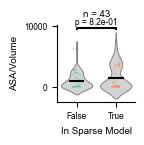

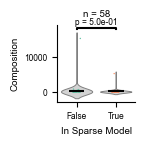

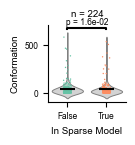

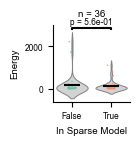

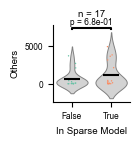

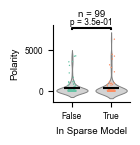

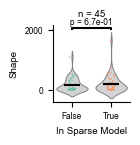

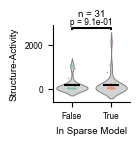

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams['font.family'] = 'Arial'

#Calculate correlation score against all scales
sum_all_in_sparse_model = [np.sum(prop_change_df.loc[folding_dddGs.reset_index(drop=True)['in_sparse_model']==True][prop]) for prop in prop_change_df.columns]
sum_all_in_sparse_model = pd.DataFrame(sum_all_in_sparse_model, index=prop_change_df.columns)
sum_all_in_sparse_model.columns = ['addition']
sum_all_in_sparse_model['abs_addition'] = abs(sum_all_in_sparse_model['addition'])
sum_all_in_sparse_model = sum_all_in_sparse_model.sort_values('addition', ascending=False)#.dropna(subset=['addition'], axis=0)
# annotate
sum_all_in_sparse_model['name'] = aaindex_featureNames.loc[sum_all_in_sparse_model.index, 'name']
sum_all_in_sparse_model['category'] = AAont.loc[sum_all_in_sparse_model.index, 'category']
sum_all_in_sparse_model['subcategory'] = AAont.loc[sum_all_in_sparse_model.index, 'subcategory']
sum_all_in_sparse_model = sum_all_in_sparse_model.sort_values('category',ascending=True)

#Calculate correlation score against all scales
sum_all_not_in_sparse_model = [np.sum(prop_change_df.loc[folding_dddGs.reset_index(drop=True)['in_sparse_model']==False][prop]) for prop in prop_change_df.columns]
sum_all_not_in_sparse_model = pd.DataFrame(sum_all_not_in_sparse_model, index=prop_change_df.columns)
sum_all_not_in_sparse_model.columns = ['addition']
sum_all_not_in_sparse_model['abs_addition'] = abs(sum_all_not_in_sparse_model['addition'])
sum_all_not_in_sparse_model = sum_all_not_in_sparse_model.sort_values('addition', ascending=False)#.dropna(subset=['addition'], axis=0)
# annotate
sum_all_not_in_sparse_model['name'] = aaindex_featureNames.loc[sum_all_not_in_sparse_model.index, 'name']
sum_all_not_in_sparse_model['category'] = AAont.loc[sum_all_not_in_sparse_model.index, 'category']
sum_all_not_in_sparse_model['subcategory'] = AAont.loc[sum_all_not_in_sparse_model.index, 'subcategory']
sum_all_not_in_sparse_model = sum_all_not_in_sparse_model.sort_values('category',ascending=True)



# Merge both datasets for plotting
sum_all_in_sparse_model["group"] = True
sum_all_not_in_sparse_model["group"] = False
merged_df = pd.concat([sum_all_in_sparse_model, sum_all_not_in_sparse_model])

# Function to perform Mann-Whitney U test for each category
def mann_whitney_by_category(data, group_col, value_col, category_col):
    categories = data[category_col].unique()
    p_values = {}
    for category in categories:
        group1 = data[(data[group_col] == True) & (data[category_col] == category)][value_col]
        group2 = data[(data[group_col] == False) & (data[category_col] == category)][value_col]
        if len(group1) > 0 and len(group2) > 0:  # Ensure there are values to compare
            stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
            p_values[category] = p_value
    return p_values

# Function to add significance annotation with scientific notation
def add_stat_annotation(ax, p_value):
    x1, x2 = 0, 1  # X locations of the groups
    y_max = ax.get_ylim()[1]
    h = (y_max - ax.get_ylim()[0]) * 0.01  # Adjust space above violins
    y = y_max * 1  # Increase space between line and violins
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')

    # Format p-value in scientific notation
    text = f"p = {p_value:.1e}"
    ax.text((x1 + x2) * 0.5, y + h * 4, text, ha='center', va='bottom', color='black', fontsize=6)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Function to add horizontal mean lines
def add_mean_lines(ax, data, group_col, value_col):
    means = data.groupby(group_col)[value_col].mean()
    for i, (group, mean) in enumerate(means.items()):
        ax.hlines(y=mean, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=1.5, zorder=3)  # Black mean lines

# Compute p-values for each category
p_values = mann_whitney_by_category(merged_df, "group", "abs_addition", "category")

# Get total count of scales per category (assumed same in both groups)
n_per_category = merged_df.loc[merged_df['group']==True]["category"].value_counts()  # Assuming each category has same count in both groups

for category in list(merged_df['category'].unique()):

    p_value = p_values.get(category, None)    

    # Create the violin plot for the category
    fig, ax = plt.subplots(figsize=(1, 1))
    sns.violinplot(
        data=merged_df.loc[merged_df['category'] == category], x="group", y="abs_addition", hue="group",
        split=False, ax=ax, inner=None, linewidth=0.7, edgecolor='gray', palette=["lightgray", "lightgray"]
    )
    sns.stripplot(data=merged_df.loc[merged_df['category'] == category], x="group", y="abs_addition", hue='group', color='black', size=1, jitter=True, ax=ax, palette='Set2', dodge=False,legend=False)

    
    # Add mean lines
    add_mean_lines(ax, merged_df.loc[merged_df['category'] == category], "group", "abs_addition")
    
    # Add significance annotation
    add_stat_annotation(ax, p_value)
    
    # Set labels
    ax.set_xlabel("In Sparse Model", fontsize=7)
    ax.set_ylabel(category, fontsize=7)
    for label in ax.get_xticklabels():
        label.set_fontsize(6)
    for label in ax.get_yticklabels():
        label.set_fontsize(6)
    ax.legend_.remove()

    # Add title with n
    ax.set_title(f'n = {n_per_category.loc[category]}', fontsize=7)

    plt.rcParams['svg.fonttype'] = 'none'

    plt.show()
